### Build a machine learning model to predict the aggregate rating of a restaurant based on other features.

#### Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Loading the dataset and pre-processing the data

In [2]:
df=pd.read_csv(r"C:\Users\WAGHMARE\Downloads\Dataset  (1).csv")
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [3]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [4]:
col=['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency']

df=df.drop(col,axis=1)

In [5]:
df.head()

,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,Yes,No,No,No,4,4.4,Green,Very Good,270
3,No,No,No,No,4,4.9,Dark Green,Excellent,365
4,Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Has Table booking     9551 non-null   object 
 1   Has Online delivery   9551 non-null   object 
 2   Is delivering now     9551 non-null   object 
 3   Switch to order menu  9551 non-null   object 
 4   Price range           9551 non-null   int64  
 5   Aggregate rating      9551 non-null   float64
 6   Rating color          9551 non-null   object 
 7   Rating text           9551 non-null   object 
 8   Votes                 9551 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 671.7+ KB


In [7]:
df.describe()

,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000
mean,1.804837,2.666370,156.909748
std,0.905609,1.516378,430.169145
min,1.000000,0.000000,0.000000
25%,1.000000,2.500000,5.000000
50%,2.000000,3.200000,31.000000
75%,2.000000,3.700000,131.000000
max,4.000000,4.900000,10934.000000


#### Checking the Null Values

In [8]:
df.isnull().sum()

Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
df.dropna(inplace=True)

<Axes: xlabel='Rating text', ylabel='Votes'>

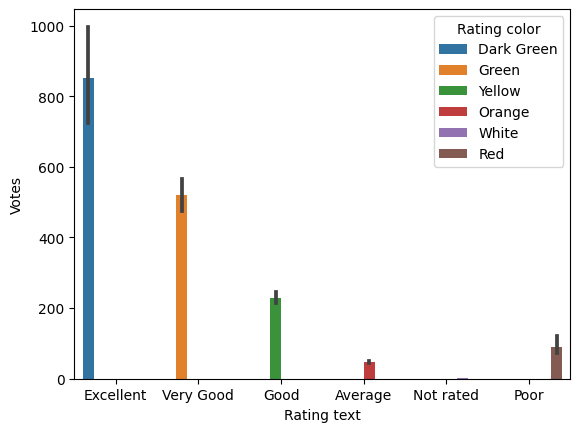

In [10]:
sns.barplot(x=df["Rating text"], y=df["Votes"], hue=df["Rating color"])

<Axes: xlabel='Aggregate rating', ylabel='Votes'>

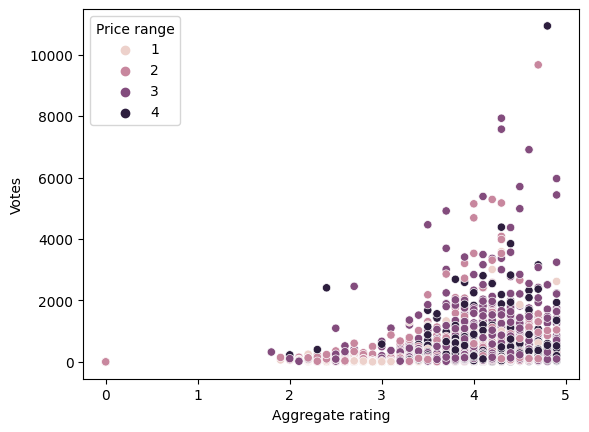

In [11]:
sns.scatterplot(x=df["Aggregate rating"],y=df["Votes"],hue=df["Price range"])

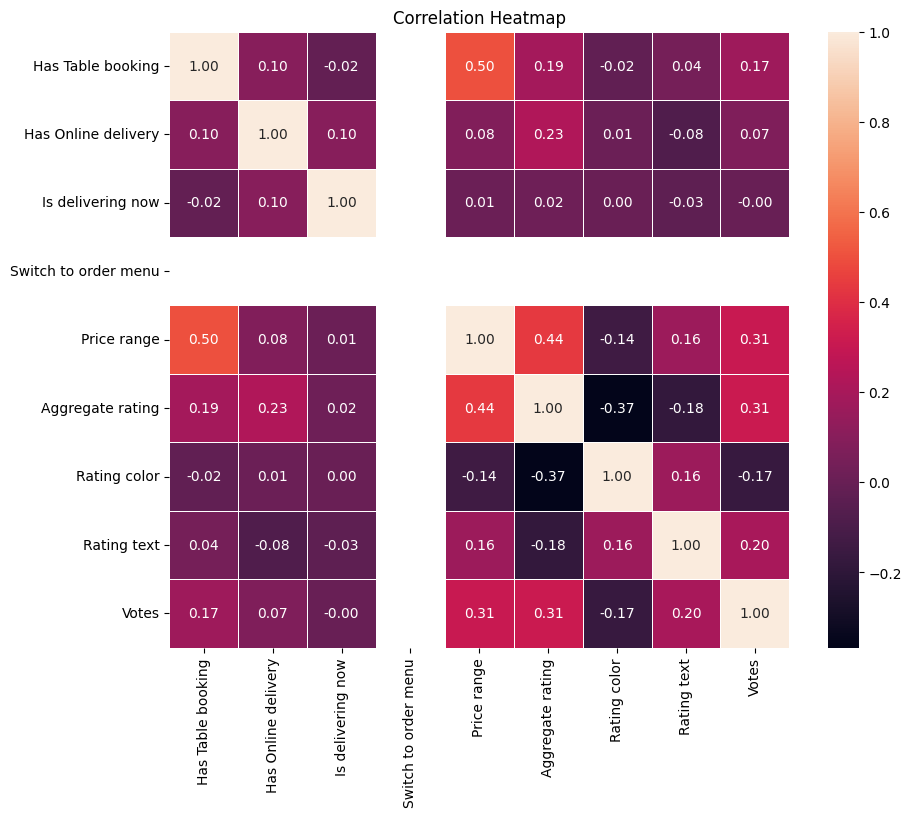

In [44]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#### Label Ecoding

In [12]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame
col=["Has Table booking","Has Online delivery","Is delivering now","Switch to order menu","Rating color","Rating text"]
le = LabelEncoder()

for column in col:
    df[column] = le.fit_transform(df[column])


In [13]:
df.head()

,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,1,0,0,0,3,4.8,0,1,314
1,1,0,0,0,3,4.5,0,1,591
2,1,0,0,0,4,4.4,1,5,270
3,0,0,0,0,4,4.9,0,1,365
4,1,0,0,0,4,4.8,0,1,229


In [14]:
df.dtypes

Has Table booking         int32
Has Online delivery       int32
Is delivering now         int32
Switch to order menu      int32
Price range               int64
Aggregate rating        float64
Rating color              int32
Rating text               int32
Votes                     int64
dtype: object

In [15]:
x=df.drop('Aggregate rating',axis=1)
y=df['Aggregate rating']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
xtrain.shape ,ytrain.shape

((7640, 8), (7640,))

#### Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
model_lr= LinearRegression()

In [20]:
model_lr.fit(xtrain,ytrain)

LinearRegression()

In [21]:
ypred=model_lr.predict(xtest)

In [22]:
ypred

array([1.46000614, 3.03636791, 3.19301938, ..., 3.17485209, 3.27371737,
       3.33939911])

In [23]:
from sklearn.metrics import r2_score,mean_squared_error

In [24]:
mse = mean_squared_error(ytest, ypred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
r2 = r2_score(ytest, ypred)
print(f"R-squared (R2) Error: {r2:.2f}")

Mean Squared Error (MSE): 1.41
R-squared (R2) Error: 0.38


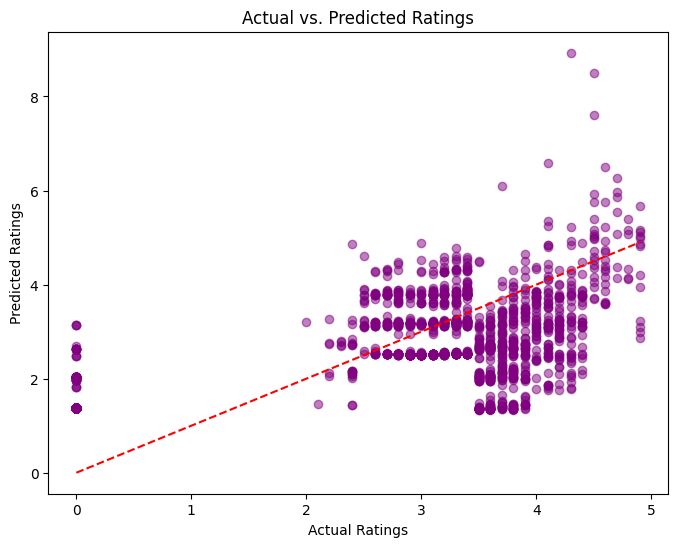

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(ytest, ypred, color='purple', alpha=0.5)
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

#### Decision Tree Regressor

In [25]:
from sklearn.tree import DecisionTreeRegressor
model_dt=DecisionTreeRegressor()

In [26]:
model_dt.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [27]:
ypred_dt=model_dt.predict(xtest)

In [28]:
ypred_dt

array([2.4       , 4.25      , 3.325     , ..., 3.02777778, 4.2       ,
       4.        ])

In [45]:
mse = mean_squared_error(ytest, ypred_dt)
print(f"Mean Squared Error (MSE): {mse:.2f}")
r2 = r2_score(ytest, ypred_dt)
print(f"R-squared (R2) Error: {r2:.2f}")

Mean Squared Error (MSE): 0.04
R-squared (R2) Error: 0.98


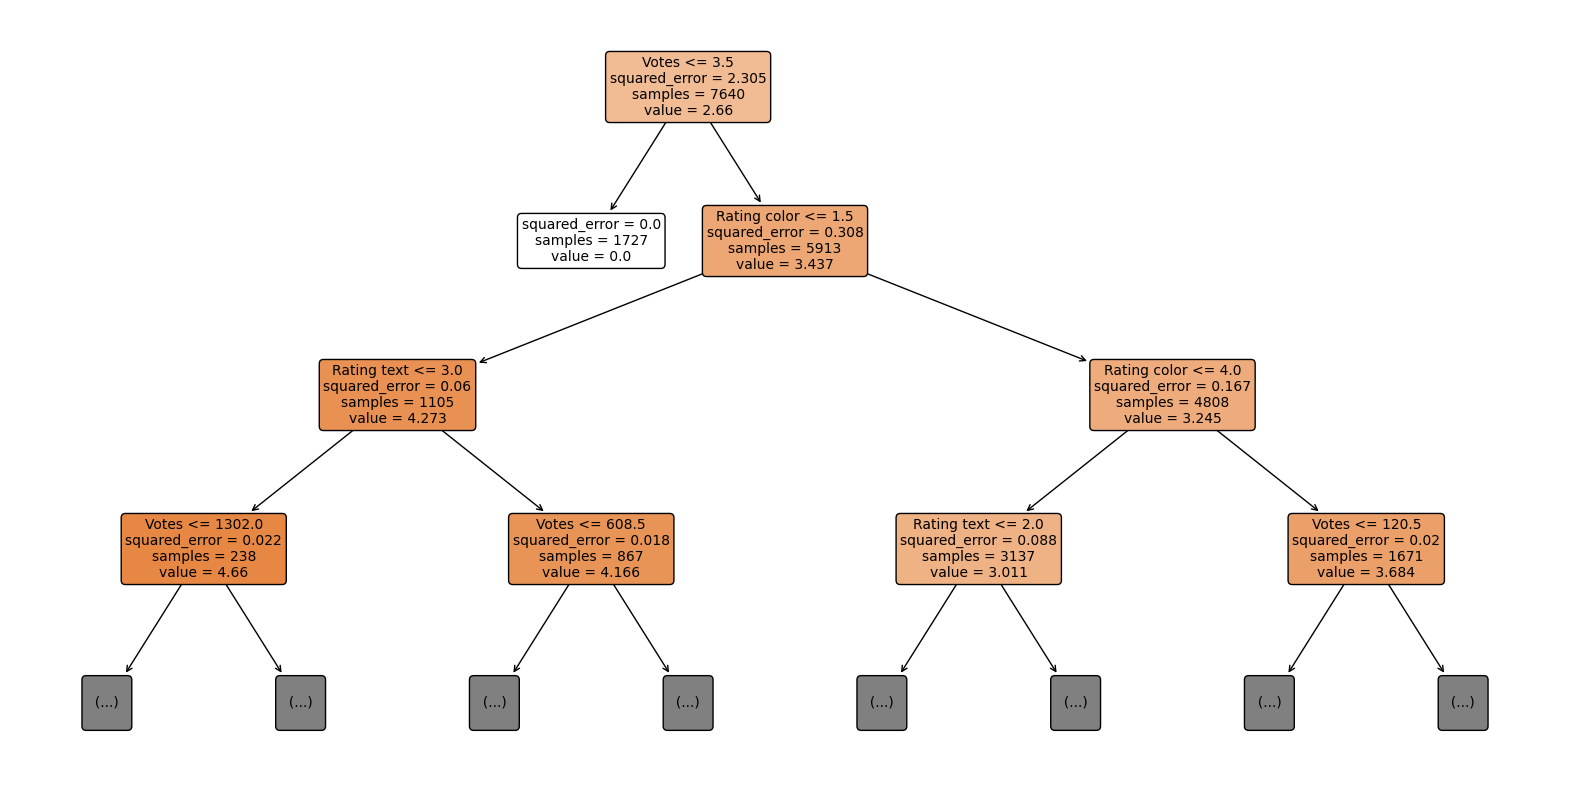

In [40]:
from sklearn.tree import plot_tree

# Convert column names to a list of strings
feature_names_list = list(x.columns)

# Visualize Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model_dt, filled=True, feature_names=feature_names_list, rounded=True, fontsize=10, max_depth=3)  # Adjust max_depth as needed
plt.show()

In [42]:
# Create a DataFrame with actual and predicted values
actual_vs_predicted = pd.DataFrame({'Actual': ytest, 'Predicted': ypred_dt})

# Display the DataFrame
print(actual_vs_predicted)


      Actual  Predicted
4731     2.1   2.400000
1468     4.1   4.250000
9037     3.2   3.325000
7866     4.4   4.000000
5570     3.5   3.500000
...      ...        ...
8149     2.6   3.133333
5849     0.0   0.000000
9019     3.1   3.027778
742      4.2   4.200000
180      4.3   4.000000

[1911 rows x 2 columns]


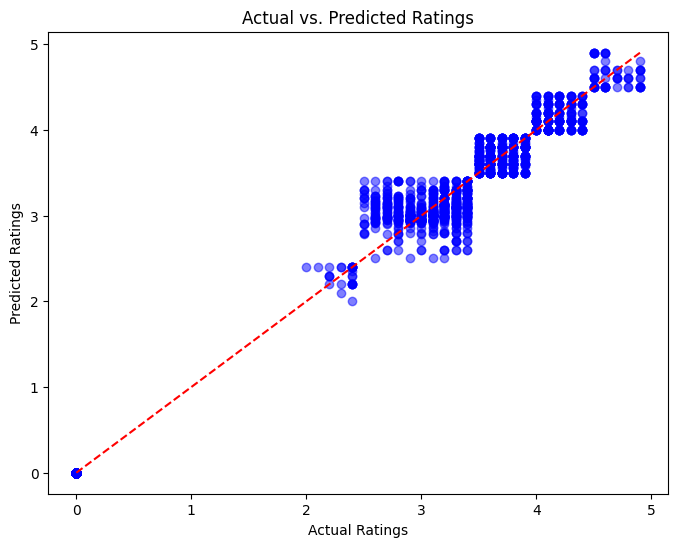

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(ytest, ypred_dt, color='blue', alpha=0.5)
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='red', linestyle='--')
plt.title('Actual vs. Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

### Conclusion:
MSE of 0.04 indicates that model's predictions are very accurate & low errors.
R2 value of 0.98 suggests that model is highly effective at explaining & predicting the target variable.
Decision Tree Regressor model is performing exceptionally well on our test data.